<a href="https://colab.research.google.com/github/BANADDA/mnist_image_classification/blob/main/Standard_network_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_test, y_test), (x_train,y_train) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#Get the image shape
print(x_train.shape)
print(y_test.shape)

(10000, 28, 28)
(60000,)


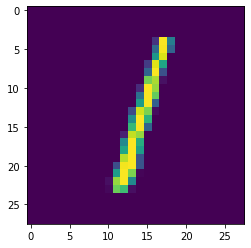

In [5]:
plt.imshow(x_train[2])

In [16]:
# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [17]:
from tensorflow.keras.utils import to_categorical
# One-Hot Encoding:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


## **Convolusional Neural Network (CNN)**

**Using Sequential API**

In [45]:
# Build the CNN model
model = Sequential()
# Add model layers
model.add(layers.Conv2D(64, kernel_size=3, activation = 'relu', input_shape=(28,28,1)))
model.add(layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
model.add(layers.Flatten())
model.add(Dense(10,activation='softmax'))

In [46]:
 # summarize layers
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 4608)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                46090     
                                                                 
Total params: 65,194
Trainable params: 65,194
Non-trainable params: 0
__________________________________________________

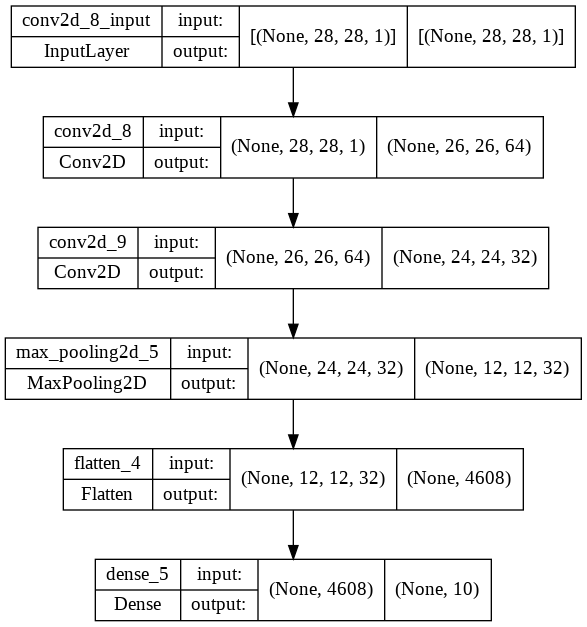

In [47]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the input and outputs of each layer
plot_model(model,show_shapes=True)

In [48]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [49]:
#Train the model
hist = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=10)

Epoch 1/10
313/313 [==============================] - 56s 179ms/step - loss: 2.0188 - accuracy: 0.3114 - val_loss: 0.7580 - val_accuracy: 0.7965
Epoch 2/10
313/313 [==============================] - 57s 182ms/step - loss: 0.4621 - accuracy: 0.8681 - val_loss: 0.4147 - val_accuracy: 0.8770
Epoch 3/10
313/313 [==============================] - 57s 182ms/step - loss: 0.3486 - accuracy: 0.9005 - val_loss: 0.3733 - val_accuracy: 0.8911
Epoch 4/10
313/313 [==============================] - 56s 181ms/step - loss: 0.3176 - accuracy: 0.9078 - val_loss: 0.3639 - val_accuracy: 0.8910
Epoch 5/10
313/313 [==============================] - 56s 179ms/step - loss: 0.2974 - accuracy: 0.9122 - val_loss: 0.3658 - val_accuracy: 0.8903
Epoch 6/10
313/313 [==============================] - 56s 179ms/step - loss: 0.2800 - accuracy: 0.9178 - val_loss: 0.3444 - val_accuracy: 0.8980
Epoch 7/10
313/313 [==============================] - 57s 183ms/step - loss: 0.2687 - accuracy: 0.9207 - val_loss: 0.3336 - val_ac

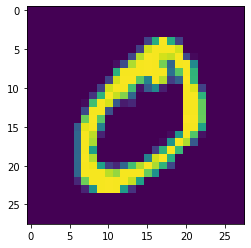

In [52]:
my_number = x_test[1]
plt.imshow(my_number.reshape(28,28))

In [53]:
predictions = np.argmax(model.predict(my_number.reshape(1,28,28,1)),axis=1)
print(predictions)

[0]
